<a href="https://colab.research.google.com/github/Rahma-Osama/Learn_ANN__Diabetes/blob/main/learn_ANN_tesnorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)  # Should print the installed TensorFlow version


2.18.0


# Tensorflow?


We'll use tensorflow to apply matrices multiplication same a numpy but using a GPU to increase performance of training

In [2]:
a=tf.constant(2)
b=tf.constant(4)
z=tf.add(a,b)
print(z)

tf.Tensor(6, shape=(), dtype=int32)


In [3]:
c=tf.constant([[1,2,3],[4,5,6]])
c.shape
d=tf.constant([[1,2,3],[4,5,6],[7,8,9]])
print(tf.matmul(c,d))

tf.Tensor(
[[30 36 42]
 [66 81 96]], shape=(2, 3), dtype=int32)


# ANN Model


keras is an api for tensorflow

In [4]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential #base for layers
from keras.layers import Dense  #add actual alyers


In [5]:
df=pd.read_csv('/content/diabetes3.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
# split data into train and test
x=df.iloc[:,:-1].values
y=df.iloc[:, -1].values

#Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

#split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=.7,random_state=42)




In [9]:
#create model base
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# compile model to transform nn to model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #adam optimizer is update of gradient decent

In [11]:
#model training
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2) #epochs-> num of iterations


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5471 - loss: 0.7245 - val_accuracy: 0.6296 - val_loss: 0.6920
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6354 - loss: 0.6725 - val_accuracy: 0.6944 - val_loss: 0.6473
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6525 - loss: 0.6317 - val_accuracy: 0.6944 - val_loss: 0.6018
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6656 - loss: 0.5935 - val_accuracy: 0.7037 - val_loss: 0.5663
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7372 - loss: 0.5454 - val_accuracy: 0.7130 - val_loss: 0.5409
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7450 - loss: 0.5180 - val_accuracy: 0.7037 - val_loss: 0.5222
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7502 - loss: 0.5123 - val_accuracy: 0.7037 - val_loss: 0.5096
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7506 - loss: 0.4954 - val_accuracy: 0.7130 -

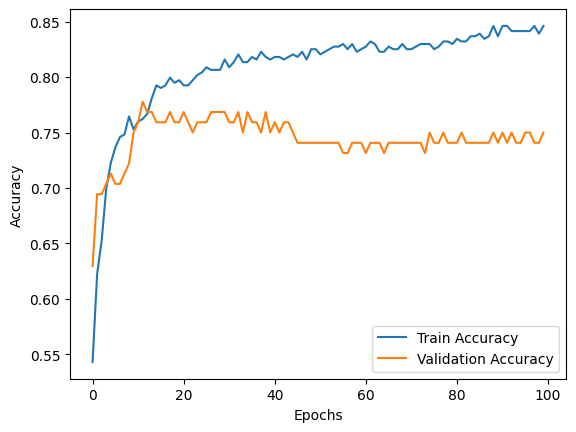

In [12]:
#visualizing training & validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


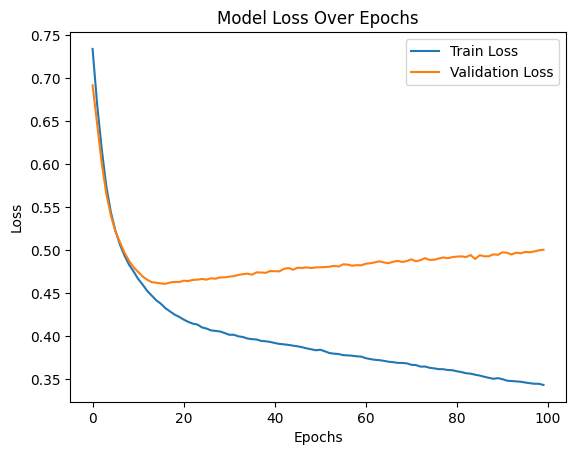

In [13]:
#visualizing training & validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


In [19]:
import numpy as np
model.predict(np.array([[5,200,150,30,200,200,0.02,62]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[1.]], dtype=float32)

In [15]:
#save the model
model.save('diabetes_ANN_model_1.h5')

In [16]:
from tensorflow.keras.models import load_model
saved_model= load_model('/content/diabetes_ANN_model_1.h5')  # Load the saved model


In [18]:
saved_model.predict(np.array([[5,200,150,30,200,200,0.02,62]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


array([[1.]], dtype=float32)